# 0 Environment Setup

In [1]:
# Change output format
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set work directory
import os
os.getcwd()
os.chdir('/Users/bryan/Documents/Python/Data')
os.getcwd()

# Import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# 1 Data Exploration

## 1.1 Load data and preview

In [2]:
raw_df = pd.read_csv('bank.csv')
raw_df.head() # dataset preview
print ("Num of rows: " + str(raw_df.shape[0])) # row count
print ("Num of columns: " + str(raw_df.shape[1])) # col count
#raw_df.info()
#raw_df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Num of rows: 10000
Num of columns: 14


## 1.2 Data cleaning

In [3]:
# Categorical feature checking
df = raw_df
df['Gender'][0]

# Whitespaces removal
df['Surname'] = df['Surname'].map(lambda x: x.strip())
df['Geography'] = df['Geography'].map(lambda x: x.strip())
df['Gender'] = df['Gender'].map(lambda x: x.strip())


'Female'

In [4]:
# Missing values 

# Checking
df.isnull().sum() # NA in features
#df.isnull().any(axis=1) # NA in rows

# Dropping
#df.dropna(axis='index') # drop the rows with NA
#df.dropna(thresh=5) # drop the rows with at least 5 values

# Filling
#df.fillna(0) # fill with 0
#df["preMLScore"].fillna(df["preMLScore"].median(), inplace=True) # fill with median
#df["postMLScore"].fillna(df.groupby("gender")["postMLScore"].transform("mean"), inplace=True) # fill with median by group

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Duplication

# Checking
df.duplicated().sum()
#np.where(df.duplicated()) # Positions of duplications

# Dropping
#df=df.drop_duplicates()

0

In [6]:
# Outlier
#sns.boxplot(df['Balance'],orient='v')

# 2 Feature Engineering

## 2.1 Feature exploration 

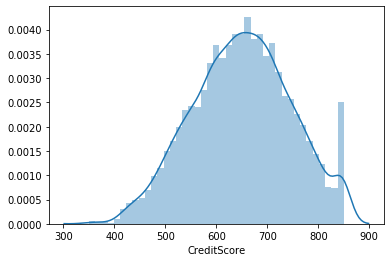

In [7]:
# Check the distribution of features
sns.distplot(df['CreditScore'])

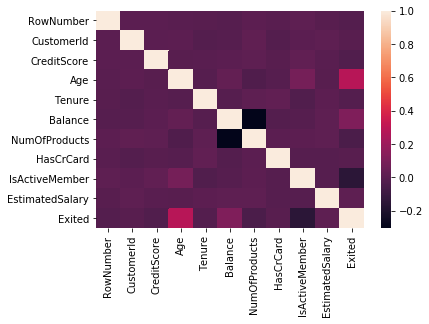

In [8]:
# correlations between all the features
corr = df[["RowNumber", "CustomerId", "Surname",
                    "CreditScore", "Geography", "Gender",
                    "Age", "Tenure", "Balance",
                    "NumOfProducts", "HasCrCard", "IsActiveMember",
                    "EstimatedSalary", "Exited"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

In [9]:
# check the actual values of correlations
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [10]:
# calculate two features correlation
from scipy.stats import pearsonr
print (pearsonr(df['Age'], df['Exited'])[0])

0.28532303783506796


## 2.2 Feature preprocessiing

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# One-hot encoding
df = pd.get_dummies(df, columns=['Geography','Gender'])
df.head()
#test_df = df
#pd.get_dummies(test_df, columns=['Gender'])
#pd.get_dummies(test_df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [13]:
# Get ground truth data

#y = np.where(df['Exited'] == 'True.',1,0)
y = df.Exited
y

# Drop some useless columns
to_drop = ['RowNumber','CustomerId','Surname','Exited']
feat_space = df.drop(to_drop, axis=1)

# Convert some features to boolean values
#yes_no_cols = ["intl_plan","voice_mail_plan"]
#churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

X = feat_space
X.head()

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [14]:
# Check the propotion of y = 1
print(y.sum() / y.shape * 100)

[20.37]


In [15]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

# 3 Model Training

## 3.1 Split dataset

In [16]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observations with %d features'% X_train.shape)
print('test data has %d observations with %d features'% X_test.shape)

training data has 8000 observations with 13 features
test data has 2000 observations with 13 features


## 3.2 Model training and selection

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

#### Logistic regression

In [18]:
# Train the model - logistic
classifier_logistic.fit(X_train, y_train)

# Prediction of test data
classifier_logistic.predict(X_test)

# Accuracy of test data
classifier_logistic.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([0, 0, 0, ..., 0, 0, 0])

0.815

#### KNN

In [19]:
# Train the model - KNN
classifier_KNN.fit(X_train, y_train)

# Prediction of test data
classifier_KNN.predict(X_test)

# Accuracy of test data
classifier_KNN.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

array([0, 0, 0, ..., 0, 0, 0])

0.825

#### Random Forest

In [20]:
# Train the model - Random forest
classifier_RF.fit(X_train, y_train)

# Prediction of test data
classifier_RF.predict(X_test)

# Accuracy of test data
classifier_RF.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

array([0, 0, 0, ..., 0, 0, 0])

0.8555

In [21]:
# Use 5-fold Cross Validation to get the accuracy for the 3 models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # print(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.810
Model accuracy of KNN is: 0.828
Model accuracy of Random Forest is: 0.862


# 4 Model Evaluation

## 4.1 Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Helper functions

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.856
precision is: 0.743
recall is: 0.441


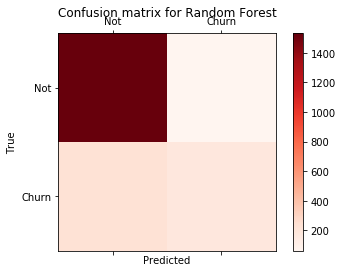

Logistic Regression
Accuracy is: 0.815
precision is: 0.661
recall is: 0.182


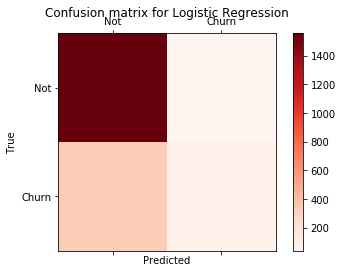

In [23]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,classifier_RF.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,classifier_logistic.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

## 4.2 ROC & AUC

#### Random Forest

In [24]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = classifier_RF.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve - RF model')

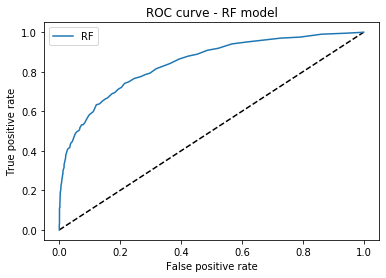

In [25]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [26]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8431371337095388

#### Logistic Regression

In [27]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = classifier_logistic.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve - LR Model')

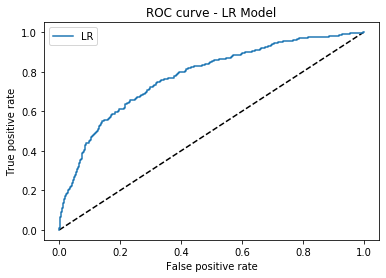

In [28]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [29]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7771013220760117

# 5 Feature Selection

#### logistic regression

In [30]:
# add L2 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 5)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([-0.06458515,  0.76234906, -0.04611258,  0.16451223, -0.05904878,
       -0.02035904, -0.537354  ,  0.02763983, -0.1218616 ,  0.23017042,
       -0.09001058,  0.13155525, -0.13155525])

Logistic Regression (L2) Coefficients
Age: 0.7623
IsActiveMember: -0.5374
Geography_Germany: 0.2302
Balance: 0.1645
Gender_Female: 0.1316
Gender_Male: -0.1316
Geography_France: -0.1219
Geography_Spain: -0.09
CreditScore: -0.0646
NumOfProducts: -0.059
Tenure: -0.0461
EstimatedSalary: 0.0276
HasCrCard: -0.0204


#### random forest

In [31]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), feat_space.columns), reverse=True):
    print (v + ": " + str(k))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Feature importance ranking by Random Forest Model:
Age: 0.2412
EstimatedSalary: 0.1455
CreditScore: 0.1447
Balance: 0.1419
NumOfProducts: 0.1271
Tenure: 0.0851
IsActiveMember: 0.0395
Geography_Germany: 0.0211
HasCrCard: 0.0174
Geography_France: 0.0111
Geography_Spain: 0.0089
Gender_Male: 0.0087
Gender_Female: 0.0077


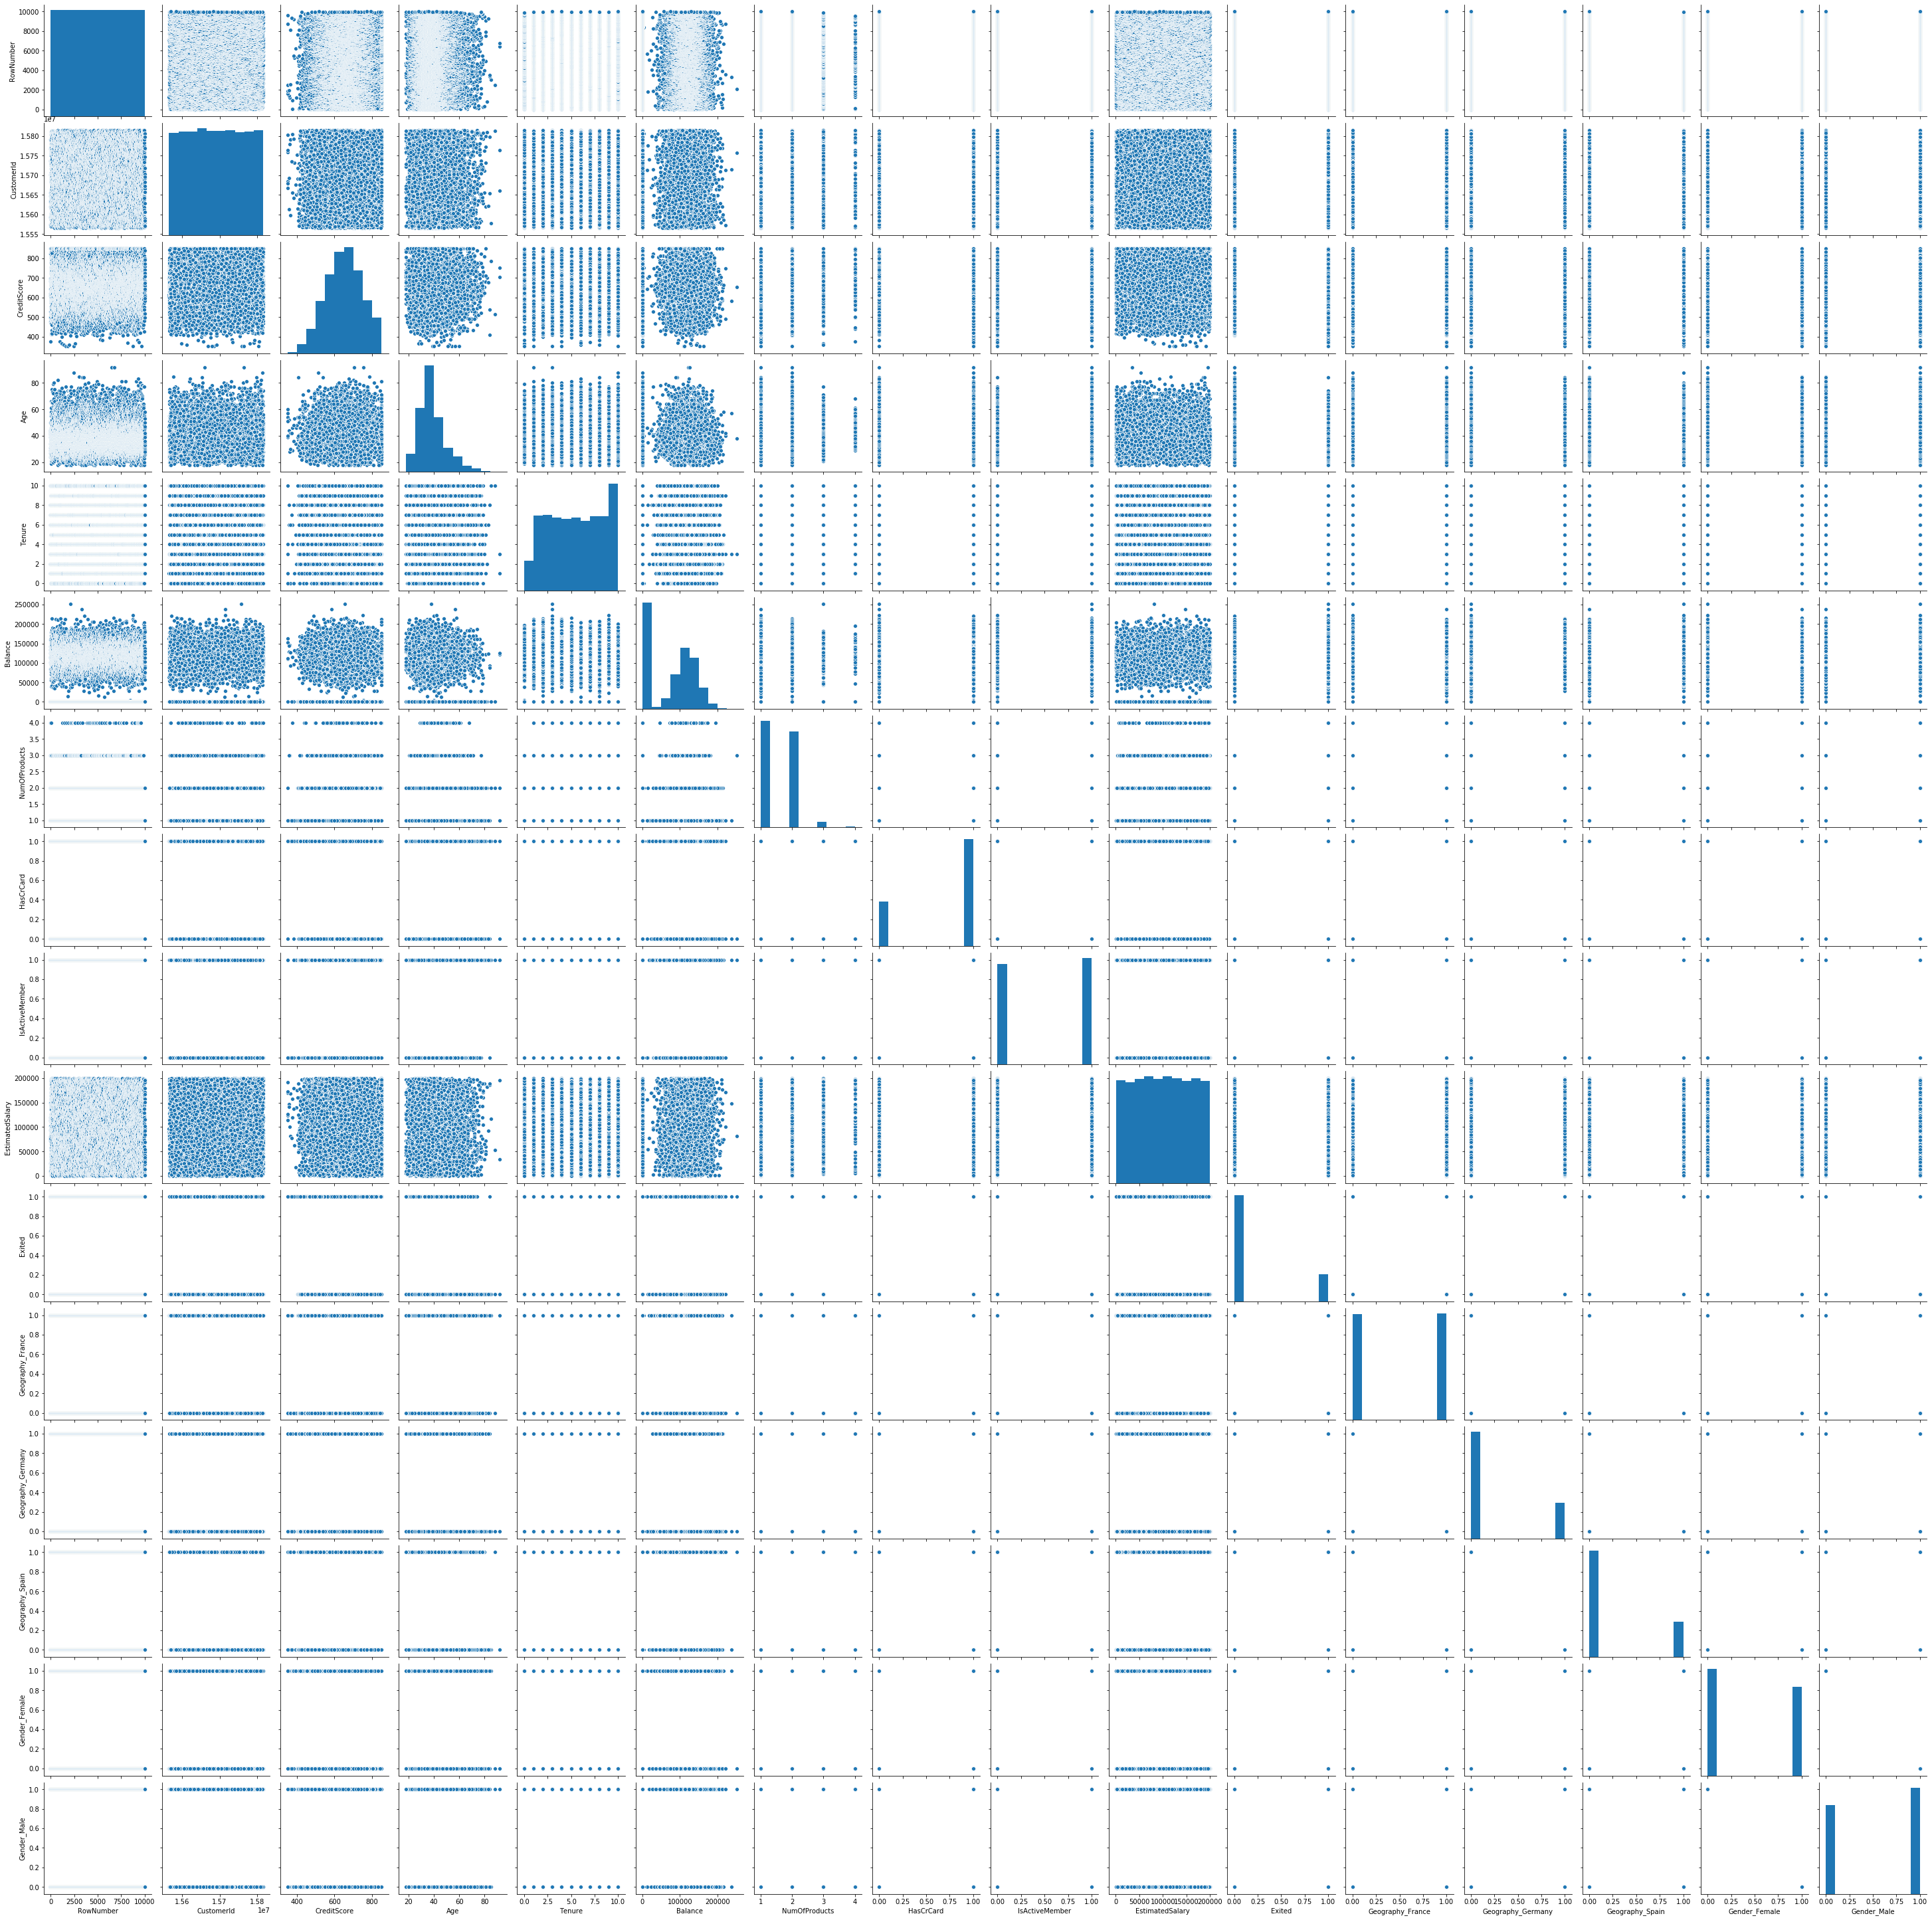

In [32]:
sns.pairplot(df)